# Training models JC

## Packages and dataset imports

In [1]:
# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Text splitting
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
# Import clean dataset 
df_em_clean = pd.read_csv('dataset-clean.csv')
# Show clean dataset 
df_em_clean = df_em_clean.set_index('id')
df_em_clean.head()

,tweet,emotion,clean,Tweet_len,hashtags,n_htags,word_count,ev_emoji,stopwords,stem,polarity
id,,,,,,,,,,,
1255337686510055424,TIME TO PLAN YOUR END OF YEAR PARTY!\nWe are n...,0.40000,time to plan your end of year party we are no...,245,set(),0,37,0,time plan year party taking bookings iso funct...,time plan end year parti take book end iso fun...,1
1255337898473390080,Impact of COVID-19 on HIV-Associated Lipodystr...,0.25000,impact of covid 19 on hiv associated lipodystr...,246,set(),0,32,0,impact covid 19 hiv associated lipodystrophy t...,impact covid 19 hiv associ lipodystrophi treat...,1
1255339536223211520,"Tailgating at Camp Covid on a cool, breezy nig...",0.35000,tailgating at camp covid on a cool breezy nigh...,192,set(),0,29,0,tailgating camp covid cool breezy night living...,tailgat camp covid cool breezi night live bode...,1
1255339600446398465,"TURN OFF SA COVID, ON NA ON SA SQUID: Fresh na...",0.36875,turn off sa covid on na on sa squid fresh na ...,241,"{'misamisoccidental', 'oroquietacity'}",2,37,0,turn covid squid fresh fresh blue seawaters or...,turn sa covid na sa squid fresh na fresh blue ...,1
1255339834224381952,"If self isolation works for COVID-19, maybe we...",-0.00625,if self isolation works for covid 19 maybe we ...,269,set(),0,47,0,self isolation works covid 19 maybe try things...,self isol work covid 19 mayb tri thing suck go...,-1


In [3]:
# Detected NaN text so remove it
df_em_clean = df_em_clean.drop(df_em_clean[df_em_clean.stopwords.isna()].index)

In [4]:
# Check
df_em_clean[df_em_clean.stopwords.isna()]

,tweet,emotion,clean,Tweet_len,hashtags,n_htags,word_count,ev_emoji,stopwords,stem,polarity
id,,,,,,,,,,,


## Transformations

In [5]:
# Clean set
# Delete first column and select proper columns 
df_em_clean.columns = ['tweet','emotion','clean','Tweet_len','hashtags','n_htags','word_count','ev_emojis','clean_text','stem','polarity']
df_em_clean.drop(['hashtags'], axis=1, inplace=True)
df_em_clean.head()

,tweet,emotion,clean,Tweet_len,n_htags,word_count,ev_emojis,clean_text,stem,polarity
id,,,,,,,,,,
1255337686510055424,TIME TO PLAN YOUR END OF YEAR PARTY!\nWe are n...,0.40000,time to plan your end of year party we are no...,245,0,37,0,time plan year party taking bookings iso funct...,time plan end year parti take book end iso fun...,1
1255337898473390080,Impact of COVID-19 on HIV-Associated Lipodystr...,0.25000,impact of covid 19 on hiv associated lipodystr...,246,0,32,0,impact covid 19 hiv associated lipodystrophy t...,impact covid 19 hiv associ lipodystrophi treat...,1
1255339536223211520,"Tailgating at Camp Covid on a cool, breezy nig...",0.35000,tailgating at camp covid on a cool breezy nigh...,192,0,29,0,tailgating camp covid cool breezy night living...,tailgat camp covid cool breezi night live bode...,1
1255339600446398465,"TURN OFF SA COVID, ON NA ON SA SQUID: Fresh na...",0.36875,turn off sa covid on na on sa squid fresh na ...,241,2,37,0,turn covid squid fresh fresh blue seawaters or...,turn sa covid na sa squid fresh na fresh blue ...,1
1255339834224381952,"If self isolation works for COVID-19, maybe we...",-0.00625,if self isolation works for covid 19 maybe we ...,269,0,47,0,self isolation works covid 19 maybe try things...,self isol work covid 19 mayb tri thing suck go...,-1


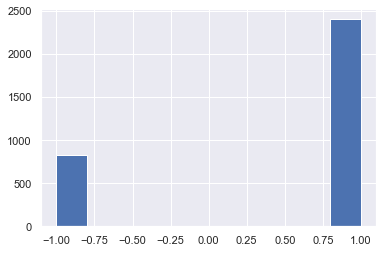

In [6]:
df_em_clean['polarity'].hist()

In [7]:
###########
## Apply count vectorizer to 2 dfs.
##   - The first one has emotions with any values between -1 and 1
##   - The second works with -1 or 1 and both clean_text and stem
###########
count_vectorizer = CountVectorizer()

# Test with raw test for KNN
# Count Vectorizer with clean_text with polarity [-1 or 1]
counts = count_vectorizer.fit_transform(df_em_clean['tweet'].values)
targets = df_em_clean['polarity'].values

# Count Vectorizer with clean_text with polarity [-1 or 1]
counts_2 = count_vectorizer.fit_transform(df_em_clean['clean'].values)
targets_2 = df_em_clean['polarity'].values

# Count Vectorizer with stem_text with polarity [-1 or 1]
counts_3 = count_vectorizer.fit_transform(df_em_clean['stem'].values)
targets_3 = df_em_clean['polarity'].values

## Splitting and creating X and Y

In [8]:
# Create variables for both stem and not stem without SMOTE
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(counts, targets, test_size=0.25, random_state=33)
X_train_2_unbalanced, X_test_2_unbalanced, y_train_2_unbalanced, y_test_2_unbalanced = train_test_split(counts_2, targets_2, test_size=0.25, random_state=33)
X_train_3_unbalanced, X_test_3_unbalanced, y_train_3_unbalanced, y_test_3_unbalanced = train_test_split(counts_3, targets_3, test_size=0.25, random_state=33)

##  Using SMOTE

In [9]:
# Using SMOTE to balance the dataset (It avoids overfitting)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_2, y_train_2 = sm.fit_sample(X_train_2_unbalanced, y_train_2_unbalanced)
X_test_2, y_test_2 = sm.fit_sample(X_test_2_unbalanced, y_test_2_unbalanced)
X_train_3, y_train_3 = sm.fit_sample(X_train_3_unbalanced, y_train_3_unbalanced)
X_test_3, y_test_3 = sm.fit_sample(X_test_3_unbalanced, y_test_3_unbalanced)

# Algorithms

### General Imports

In [10]:
import sklearn
import numpy as np
from sklearn.ensemble        import RandomForestClassifier
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.metrics         import accuracy_score

### Logistic Regression

In [11]:
# Logistic Regression

## Logistic Regression with clean text

LogReg_JC = sklearn.linear_model.LogisticRegression()  

### Balanced
LogReg_JC.fit(X_train_2, y_train_2)
LogReg_pred_JC = LogReg_JC.predict(X_test_2)
LogReg_acc_JC = accuracy_score(LogReg_pred_JC, y_test_2)
print('LogisticRegression accuracy with clean text columnd and balanced is: ' + str(LogReg_acc_JC))

LogReg_JC_unbalanced = sklearn.linear_model.LogisticRegression()  

### Unbalanced
LogReg_JC_unbalanced.fit(X_train_2_unbalanced, y_train_2_unbalanced)
LogReg_pred_JC_unbalanced = LogReg_JC_unbalanced.predict(X_test_2_unbalanced)
LogReg_acc_JC_unbalanced = accuracy_score(LogReg_pred_JC_unbalanced, y_test_2_unbalanced)
print('LogisticRegression accuracy with clean text columnd and unbalanced is: ' + str(LogReg_acc_JC_unbalanced))

## Logistic Regression with stemmed text

LogReg_JC_2 = sklearn.linear_model.LogisticRegression()  

### Balanced
LogReg_JC_2.fit(X_train_3, y_train_3)
LogReg_pred_JC_2 = LogReg_JC_2.predict(X_test_3)
LogReg_acc_JC_2 = accuracy_score(LogReg_pred_JC_2, y_test_3)
print('LogisticRegression accuracy with clean text with stemmed text columns and balanced is: ' + str(LogReg_acc_JC_2))

LogReg_JC_unbalanced_2 = sklearn.linear_model.LogisticRegression()  

### Unbalanced
LogReg_JC_unbalanced_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
LogReg_pred_JC_unbalanced_2 = LogReg_JC_unbalanced_2.predict(X_test_3_unbalanced)
LogReg_acc_JC_unbalanced_2 = accuracy_score(LogReg_pred_JC_unbalanced_2, y_test_3_unbalanced)
print('LogisticRegression accuracy with clean text with stemmed text columns and unbalanced is: ' + str(LogReg_acc_JC_unbalanced_2))


LogisticRegression accuracy with clean text columnd and balanced is: 0.8646362098138748
LogisticRegression accuracy with clean text columnd and unbalanced is: 0.8349875930521092
LogisticRegression accuracy with clean text with stemmed text columns and balanced is: 0.8629441624365483
LogisticRegression accuracy with clean text with stemmed text columns and unbalanced is: 0.8213399503722084


In [12]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_3, LogReg_pred_JC_2))

# Report
print(classification_report(y_test_3, LogReg_pred_JC_2))

[[517  74]
 [ 88 503]]
              precision    recall  f1-score   support

          -1       0.85      0.87      0.86       591
           1       0.87      0.85      0.86       591

    accuracy                           0.86      1182
   macro avg       0.86      0.86      0.86      1182
weighted avg       0.86      0.86      0.86      1182



Como se puede ver, el segundo resultado (texto sin stopwords y stemmed) arroja peores resultados (por muy poco, por tanto se puede considerar lo mismo) que el primero que únicamente tiene un primer preprocesamiento hecho (quitar "@", links, etc). 
Es por ello por lo que se plantea que el preprocesamiento para este caso no es del todo importante. Además otra conclusión clara es que el balanceo del dataset usando SMOTE ayuda mucho a la precisión final tal y como se aprecia en los resultados.

### Perceptron

In [13]:
# Perceptron

## Perceptron with clean text

Perc_JC = Perceptron(max_iter=10000,tol=0.1)

### Balanced
Perc_JC.fit(X_train_2, y_train_2)
Perc_JC_pred = Perc_JC.predict(X_test_2)
Perc_JC_acc = accuracy_score(Perc_JC_pred, y_test_2)
print('Perceptron accuracy with clean text column and balanced is: ' + str(Perc_JC_acc))


### Unbalanced
Perc_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
Perc_JC_pred_unbalanced = Perc_JC.predict(X_test_2_unbalanced)
Perc_JC_acc_unbalanced = accuracy_score(Perc_JC_pred_unbalanced, y_test_2_unbalanced)
print('Perceptron accuracy with clean text column and unbalanced is: ' + str(Perc_JC_acc_unbalanced))

## Perceptron with stemmed text

Perc_JC_2 = Perceptron(max_iter=10000,tol=0.1)

### Balanced
Perc_JC_2.fit(X_train_3, y_train_3)
Perc_JC_pred_2 = Perc_JC_2.predict(X_test_3)
Perc_JC_acc_2 = accuracy_score(Perc_JC_pred_2, y_test_3)
print('Perceptron accuracy with stemmed text column and balanced is: ' + str(Perc_JC_acc_2))

### Unbalanced
Perc_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
Perc_JC_unbalanced_pred_2 = Perc_JC_2.predict(X_test_3_unbalanced)
Perc_JC_acc_unbalanced_2 = accuracy_score(Perc_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('Perceptron accuracy with stemmed text column and unbalanced is: ' + str(Perc_JC_acc_unbalanced_2))

Perceptron accuracy with clean text column and balanced is: 0.868020304568528
Perceptron accuracy with clean text column and unbalanced is: 0.8337468982630273
Perceptron accuracy with stemmed text column and balanced is: 0.8595600676818951
Perceptron accuracy with stemmed text column and unbalanced is: 0.8225806451612904


In [14]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_2, Perc_JC_pred))

# Report
print(classification_report(y_test_2, Perc_JC_pred))

[[483 108]
 [ 48 543]]
              precision    recall  f1-score   support

          -1       0.91      0.82      0.86       591
           1       0.83      0.92      0.87       591

    accuracy                           0.87      1182
   macro avg       0.87      0.87      0.87      1182
weighted avg       0.87      0.87      0.87      1182



Como en el caso anterior, las conclusiones vuelven a ser muy parecidas. Se obtienen aproximadamente los mismos resultados. La limpieza del texto deja la accuracy prácticamente idéntica (incluso la disminuye), pero el balanceo del dataset mejora sustancialmente los resultados.

### Multi Layer Perceptron

In [15]:
# MLP

## MLP with clean text

MLP_JC = MLPClassifier(hidden_layer_sizes = (50,40,50))

### Balanced
MLP_JC.fit(X_train_2, y_train_2)
MLP_JC_pred = MLP_JC.predict(X_test_2)
MLP_JC_acc = accuracy_score(MLP_JC_pred, y_test_2)
print('MLP accuracy with clean text column and balanced is: ' + str(MLP_JC_acc))

### Unbalanced
MLP_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
MLP_JC_pred_unbalanced = MLP_JC.predict(X_test_2_unbalanced)
MLP_JC_acc_unbalanced = accuracy_score(MLP_JC_pred_unbalanced, y_test_2_unbalanced)
print('MLP accuracy with clean text column and unbalanced is: ' + str(MLP_JC_acc_unbalanced))

## MLP with stemmed text

MLP_JC_2 = MLPClassifier(hidden_layer_sizes = (50,40,50))

### Balanced
MLP_JC_2.fit(X_train_3, y_train_3)
MLP_JC_pred_2 = MLP_JC_2.predict(X_test_3)
MLP_JC_acc_2 = accuracy_score(MLP_JC_pred_2, y_test_3)
print('MLP accuracy with stemmed text column and balanced is: ' + str(MLP_JC_acc_2))

### Unbalanced
MLP_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
MLP_JC_unbalanced_pred_2 = MLP_JC_2.predict(X_test_3_unbalanced)
MLP_JC_unbalanced_acc_2 = accuracy_score(MLP_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('MLP accuracy with stemmed text column and unbalanced is: ' + str(MLP_JC_unbalanced_acc_2))

MLP accuracy with clean text column and balanced is: 0.8663282571912013
MLP accuracy with clean text column and unbalanced is: 0.8424317617866005
MLP accuracy with stemmed text column and balanced is: 0.8434856175972927
MLP accuracy with stemmed text column and unbalanced is: 0.8052109181141439


In [16]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_2, MLP_JC_pred))

# Report
print(classification_report(y_test_3, MLP_JC_pred))

[[513  78]
 [ 80 511]]
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       591
           1       0.87      0.86      0.87       591

    accuracy                           0.87      1182
   macro avg       0.87      0.87      0.87      1182
weighted avg       0.87      0.87      0.87      1182



En este caso las conclusiones son algo más extrañas dado que esperaba que el MLP se comportara mejor que el Perceptron simple. No ha sido así como se ve, aunque los resultados son muy parejos. De nuevo, es importante recalcar el usar el balanceo que sigue mejorando la accuracy.
Además de obtener ligeros peores resultados que el modelo previo, este modelo es menos eficiente que el anterior ya que al contar con las capas, el resultado tarda unos segundos en arrojarse mientras que el Perceptron simple es casi instantáneo.

### KNN

In [17]:
# KNN

## KNN with clean text

KNN_JC = KNeighborsClassifier(n_neighbors=5)

### Balanced
KNN_JC.fit(X_train_2, y_train_2)
KNN_JC_pred = KNN_JC.predict(X_test_2)
KNN_JC_acc = accuracy_score(KNN_JC_pred, y_test_2)
print('KNN accuracy with clean text column and balanced is: ' + str(KNN_JC_acc))

### Unbalanced
KNN_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
KNN_JC_pred_unbalanced = KNN_JC.predict(X_test_2_unbalanced)
KNN_JC_acc_unbalanced = accuracy_score(KNN_JC_pred_unbalanced, y_test_2_unbalanced)
print('KNN accuracy with clean text column and unbalanced is: ' + str(KNN_JC_acc_unbalanced))

## KNN with stemmed text

KNN_JC_2 = KNeighborsClassifier(n_neighbors=5)

### Balanced
KNN_JC_2.fit(X_train_3, y_train_3)
KNN_JC_pred_2 = KNN_JC_2.predict(X_test_3)
KNN_JC_acc_2 = accuracy_score(KNN_JC_pred_2, y_test_3)
print('KNN accuracy with stemmed text column and balanced is: ' + str(KNN_JC_acc_2))

### Unbalanced
KNN_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
KNN_JC_unbalanced_pred_2 = KNN_JC_2.predict(X_test_3_unbalanced)
KNN_JC_unbalanced_acc_2 = accuracy_score(KNN_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('KNN accuracy with stemmed text column and unbalanced is: ' + str(KNN_JC_unbalanced_acc_2))

KNN accuracy with clean text column and balanced is: 0.5194585448392555
KNN accuracy with clean text column and unbalanced is: 0.7419354838709677
KNN accuracy with stemmed text column and balanced is: 0.5245346869712352
KNN accuracy with stemmed text column and unbalanced is: 0.7667493796526055


Este es el primer algoritmo con el que se obtienen resultados algo peores, por debajo de 0.8 de accuracy. Como se ve, los mejores resultados vienen antes de balancear el dataset. Se procede a intentar mejorar la K con el dataset sin balancear para ver si es posible mejorar los resultados.
A continuación, se intenta obtener la mejor K posible:

#### K optimization unbalanced

Text(0, 0.5, 'Accuracy')

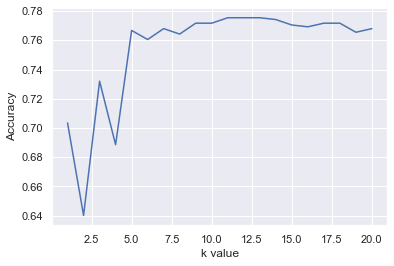

In [18]:
# K range 
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(X_train_3_unbalanced, y_train_3_unbalanced)
    y_test_pred_2 = m.predict(X_test_3_unbalanced)
    accuracy.append(metrics.accuracy_score(y_test_3_unbalanced, y_test_pred_2))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

Tal y como se aprecia, el aumento de K es positivo, por tanto se sitúa una K = 11 que mejorará bastante el clasificador siempre y cuando se use SIN balancear.

In [19]:
# KNN

## KNN with clean text

KNN_JC_opt = KNeighborsClassifier(n_neighbors=11)


### Unbalanced
KNN_JC_opt.fit(X_train_2_unbalanced, y_train_2_unbalanced)
KNN_JC_opt_pred = KNN_JC_opt.predict(X_test_2_unbalanced)
KNN_JC_opt_acc = accuracy_score(KNN_JC_opt_pred, y_test_2_unbalanced)
print('KNN accuracy opt with clean text column and unbalanced is: ' + str(KNN_JC_opt_acc))

## KNN with stemmed text

KNN_JC_opt_2 = KNeighborsClassifier(n_neighbors=11)

### Unbalanced
KNN_JC_opt_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
KNN_JC_opt_pred_2 = KNN_JC_opt_2.predict(X_test_3_unbalanced)
KNN_JC_opt_acc_2 = accuracy_score(KNN_JC_opt_pred_2, y_test_3_unbalanced)
print('KNN accuracy opt with stemmed text column and unbalanced is: ' + str(KNN_JC_opt_acc_2))

KNN accuracy opt with clean text column and unbalanced is: 0.7617866004962779
KNN accuracy opt with stemmed text column and unbalanced is: 0.7754342431761787


Aún mejorando bastante el clasificador, sigue estando lejos de los resultados de los anteriores

#### K optimization raw text

Text(0, 0.5, 'Accuracy')

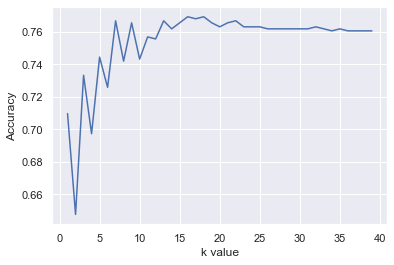

In [20]:
# K range 
k_range = range(1, 40)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(X_train_raw, y_train_raw)
    y_test_pred_2 = m.predict(X_test_raw)
    accuracy.append(metrics.accuracy_score(y_test_raw, y_test_pred_2))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

En este caso, viendo que el dataset sin balancear y con menos limpieza tenía mejores resultados, se ha estudiado sacar el mejor clasificador para texto en "raw" sin modificar nada ni balancear, como se ve, la K óptima es K = 18, con alrededor de 0,76 de precisión

In [21]:
# KNN

## KNN with clean text

KNN_JC_opt = KNeighborsClassifier(n_neighbors=18)

### Unbalanced and raw tweet
KNN_JC_opt.fit(X_train_raw, y_train_raw)
KNN_JC_opt_pred = KNN_JC_opt.predict(X_test_raw)
KNN_JC_opt_acc = accuracy_score(KNN_JC_opt_pred, y_test_raw)
print('KNN accuracy opt with clean text column and balanced is: ' + str(KNN_JC_opt_acc))



KNN accuracy opt with clean text column and balanced is: 0.7692307692307693


In [22]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_raw, KNN_JC_opt_pred ))

# Report
print(classification_report(y_test_raw, KNN_JC_opt_pred))

[[ 32 183]
 [  3 588]]
              precision    recall  f1-score   support

          -1       0.91      0.15      0.26       215
           1       0.76      0.99      0.86       591

    accuracy                           0.77       806
   macro avg       0.84      0.57      0.56       806
weighted avg       0.80      0.77      0.70       806



#  Conclusiones dataset emotions

* La limpieza del texto no es lo importante que pueda parecer para estos modelos. En la mayoría de los casos probados las diferencias son mínimas entre textos con la columna 'clean' (sin arrobas, hashtaghs y demás) vs textos con columna 'stem'.
* El balanceo del dataset sí es muy importante. Este paso se encuentra en el uso de SMOTE, justo después de dividir el dataset en train y test. Esto hace que el dataset tenga el mismo número de emociones = 1.0 y emociones = -1.0, es decir, tweets con emociones positivas y negativas por igual para que pueda ser entrenado 50%-50% con los dos tipos de resultados (y no entrenar uno mejor que otro).
* En cuanto a los algoritmos probados, KNN no ha arrojado tan buenos resultados, pero hay que tener en cuenta que sería un buen clasificador (casi 0,8) teniendo en cuenta que no haría falta hacer preprocesamiento de texto.
* Mientras que los demás podrían ser óptimos (logistic regression y  los de redes neuronales). Los mejores por resultado y eficiencia han sido el perceptron simple y logistic regression.